In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sn
from sqlalchemy import create_engine

import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = "Resources/Train_Loan_Home.csv"


In [3]:
loan_df = pd.read_csv(file)
print(len(loan_df))
loan_df.head(10)

614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Find columns with null data
### Almost every column has some type of missing data

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Any data with extreme outliers?
### Yes

In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Find unique values on text columns

In [6]:
print(str(loan_df['Gender'].unique()))
print(str(loan_df['Married'].unique()))
print(str(loan_df['Dependents'].unique()))
print(str(loan_df['Self_Employed'].unique()))
print(str(loan_df['Education'].unique()))
print(str(loan_df['Property_Area'].unique()))
print(str(loan_df['Loan_Amount_Term'].unique()))
print(str(loan_df['Credit_History'].unique()))

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]


# Find  number of missing values per column

In [7]:
loan_df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

# Fun Concrete Data

In [8]:
file1 = "Resources/Concrete_Data.csv"

In [9]:
concrete = pd.read_csv(file1)
print(len(concrete))
concrete.head(10)

1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [59]:
concrete = concrete.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement_kg_in_a_Cubic_Meter_Mixture", "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture", "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly_Ash_kg_in_a_Cubic_Meter_Mixture", "Water (component 4)(kg in a m^3 mixture)": "Water_kg_in_a_Cubic_Meter_Mixture", "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer_kg_in_a_Cubic_Meter_Mixture", "Coarse Aggregate (component 6)(kg in a m^3 mixture) ": "Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture", "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture", "Age (day)": "Age_in_Days", "Concrete compressive strength(MPa, megapascals) ": "Concrete_Compressive_Strength"})
concrete.head()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water (component 4)(kg in a m^3 mixture),Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
concrete.describe()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water (component 4)(kg in a m^3 mixture),Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
X = concrete.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = concrete.iloc[:,8]
print(X.shape, y.shape)

(1030, 8) (1030,)


In [13]:
X.head()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water (component 4)(kg in a m^3 mixture),Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# y_scaler = MinMaxScaler().fit([y_train])
# y_train_scaled = y_scaler.transform([y_train])
# y_test_scaled = y_scaler.transform([y_test])

In [16]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier

RandomForestRegressor()

In [17]:
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9846662818308952
Testing Data Score: 0.8934640992414257


In [18]:
classifier.feature_importances_

array([0.32453571, 0.07400808, 0.02079401, 0.11473706, 0.06845868,
       0.02669733, 0.03794645, 0.33282269])

In [19]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [100, 1000],
#               'criterion': ['mse', 'mae']}
# grid = GridSearchCV(classifier, param_grid, verbose=3)

In [20]:
# grid.fit(X_train_scaled, y_train)

In [21]:
# print(grid.best_params_)

In [22]:
# predictions = grid.predict(X_test_scaled)

In [23]:
# print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

In [24]:
# import joblib
# filename = 'concrete.sav'
# joblib.dump(classifier, filename)

In [26]:
concrete.corr()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water (component 4)(kg in a m^3 mixture),Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
Cement_kg_in_a_Cubic_Meter_Mixture,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash_kg_in_a_Cubic_Meter_Mixture,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer_kg_in_a_Cubic_Meter_Mixture,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age_in_Days,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete_Compressive_Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<IPython.core.display.Javascript object>


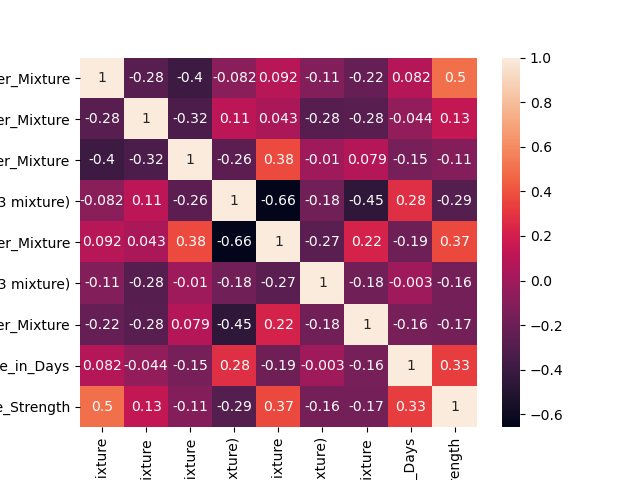

In [27]:
corr = concrete.corr()
# print(corrMatrix)
sn.heatmap(corr, annot=True)
# figure size in inches

plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609907286822649
Testing Score: 0.6249829353885574


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()
model.add(Dense(units=170, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

In [52]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [53]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=150,
    shuffle=True,
    verbose=2
)

Epoch 1/150
25/25 - 1s - loss: 1052.5592 - mae: 27.7394
Epoch 2/150
25/25 - 0s - loss: 257.5204 - mae: 12.7645
Epoch 3/150
25/25 - 0s - loss: 215.3504 - mae: 11.7104
Epoch 4/150
25/25 - 0s - loss: 192.7200 - mae: 11.1388
Epoch 5/150
25/25 - 0s - loss: 175.7610 - mae: 10.6825
Epoch 6/150
25/25 - 0s - loss: 160.9837 - mae: 10.2823
Epoch 7/150
25/25 - 0s - loss: 149.9008 - mae: 9.9144
Epoch 8/150
25/25 - 0s - loss: 140.6216 - mae: 9.6149
Epoch 9/150
25/25 - 0s - loss: 131.1607 - mae: 9.2126
Epoch 10/150
25/25 - 0s - loss: 120.8153 - mae: 8.8537
Epoch 11/150
25/25 - 0s - loss: 111.3953 - mae: 8.4760
Epoch 12/150
25/25 - 0s - loss: 101.9211 - mae: 8.0433
Epoch 13/150
25/25 - 0s - loss: 92.7094 - mae: 7.6895
Epoch 14/150
25/25 - 0s - loss: 84.5220 - mae: 7.1964
Epoch 15/150
25/25 - 0s - loss: 77.4034 - mae: 6.7636
Epoch 16/150
25/25 - 0s - loss: 73.5743 - mae: 6.7006
Epoch 17/150
25/25 - 0s - loss: 65.3142 - mae: 6.1842
Epoch 18/150
25/25 - 0s - loss: 64.1015 - mae: 6.0900
Epoch 19/150
25/25

In [54]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 35.1736 - mae: 4.3586
Normal Neural Network - Loss: 35.173561096191406, Accuracy: 4.358555316925049


In [46]:
con = model.predict(X_test_scaled)
print(con)

[[47.02658  ]
 [41.134647 ]
 [68.12541  ]
 [36.42109  ]
 [ 8.98573  ]
 [44.69097  ]
 [27.064098 ]
 [53.635567 ]
 [35.30941  ]
 [46.16447  ]
 [40.801636 ]
 [ 6.584433 ]
 [50.650135 ]
 [39.108612 ]
 [26.823927 ]
 [22.92683  ]
 [33.254234 ]
 [18.635351 ]
 [33.037106 ]
 [29.462358 ]
 [35.623066 ]
 [35.044563 ]
 [46.711494 ]
 [11.172618 ]
 [28.413982 ]
 [39.566547 ]
 [ 6.991544 ]
 [47.14418  ]
 [54.447315 ]
 [14.243703 ]
 [43.45993  ]
 [38.164864 ]
 [48.909813 ]
 [59.014774 ]
 [18.869648 ]
 [38.25891  ]
 [35.50189  ]
 [41.806458 ]
 [ 9.957133 ]
 [49.830902 ]
 [13.494221 ]
 [ 4.567562 ]
 [36.849304 ]
 [48.797035 ]
 [10.084603 ]
 [75.58145  ]
 [44.7026   ]
 [38.08281  ]
 [27.271206 ]
 [ 6.7629104]
 [51.05057  ]
 [43.55469  ]
 [26.097713 ]
 [14.653959 ]
 [46.319344 ]
 [37.720634 ]
 [26.975306 ]
 [ 8.8284855]
 [36.251884 ]
 [21.216362 ]
 [41.98442  ]
 [13.987553 ]
 [38.787544 ]
 [44.689693 ]
 [30.48892  ]
 [14.277914 ]
 [35.724308 ]
 [11.733549 ]
 [30.735306 ]
 [23.634493 ]
 [ 9.203589 ]
 [26.3

In [47]:
print(y_test)

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: Concrete_Compressive_Strength, Length: 258, dtype: float64


In [57]:
model.save("maeConcrete.h5")

In [58]:
import joblib
filename2 = 'concrete2.sav'
joblib.dump(X_scaler, filename2)

['concrete2.sav']